# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Vineet Kumar S 416807
    
    2. Julia Reim 354921
    
    3. Ningyuan Chen 350169

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random_seed = 354921

# read the csv file and construct the dataframe with first row as header
raw_dataset = pd.read_csv(r'./dataset.csv', header=0)
random_state = np.random.RandomState(random_seed)
sampled_data = raw_dataset.sample(frac=0.95, random_state=random_state)
sampled_data.to_csv(r'./sampled_data.csv')


print('Head of sampled_data:')
sampled_data.head()

Head of sampled_data:


Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
379425      379425        473193  2015      6   25            4      DL   
219787      219787        404268  2015      5    3            7      MQ   
936266      936266         55082  2015      6    8            1      MQ   
180660      180660        839286  2015      8   24            1      AA   
934401      934401        717089  2015     11   29            7      WN   

        FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  ... CANCELLED  \
379425           2306      N310DE            ATL  ...         0   
219787           3432      N662MQ            OMA  ...         0   
936266           3138      N642MQ            ORD  ...         1   
180660           1402      N864AA            SEA  ...         0   
934401           3712      N356SW            DAL  ...         0   

        CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
379425                    N               0.0             0.0           19.0   
219787                    N              35.0             0.0            0.0   
936266                    C               NaN             NaN            NaN   
180660                    N               0.0             0.0           47.0   
934401                    N               0.0             0.0            2.0   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
379425                  0.0            0.0         176    25   
219787                  0.0            0.0         123    17   
936266                  NaN            NaN         159    22   
180660                  0.0            0.0         236    33   
934401                 23.0            0.0         333    47   

        SCHEDULED_DEPARTURE_CATEGORY  
379425                       Evening  
219787                       Evening  
936266                     Afternoon  
180660                       Morning  
934401                     Afternoon  

[5 rows x 36 columns]

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [3]:
sampled_data_cancelled = sampled_data[sampled_data['CANCELLED'] == 1]
sampled_data_not_cancelled = sampled_data[sampled_data['CANCELLED'] == 0]

print('Unique values of cancellation reasons:')
print(sampled_data_cancelled['CANCELLATION_REASON'].unique())


#Unique cancellation reasons in subsets
print('Unique values of non-cancellation reasons:')
print(sampled_data_not_cancelled['CANCELLATION_REASON'].unique())

Unique values of cancellation reasons:
['C' 'B' 'A' 'D']
Unique values of non-cancellation reasons:
['N']


    Your answer:
    
* The results make sense. As the flights have not been canceled, there is no reason of cancellation. Here we only have 'N', which in our humble opinon means 'Null'. When the flights have been canceled, there should be a reason other than 'N'. Here we got 'C', 'B', 'A', 'D', indicate various reasons.

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [4]:
no_null_data = sampled_data.dropna()

no_null_data_cancelled = no_null_data[no_null_data['CANCELLED'] == 1]
no_null_data_not_cancelled = no_null_data[no_null_data['CANCELLED'] == 0]

print('Unique values of cancellation reasons:')
print(no_null_data_cancelled['CANCELLATION_REASON'].unique())


#Unique cancellation reasons in subsets
print('Unique values of non-cancellation reasons:')
print(no_null_data_not_cancelled['CANCELLATION_REASON'].unique())


print('Head of no_null_data:')
no_null_data.head()

Unique values of cancellation reasons:
[]
Unique values of non-cancellation reasons:
['N']
Head of no_null_data:


Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
379425      379425        473193  2015      6   25            4      DL   
219787      219787        404268  2015      5    3            7      MQ   
180660      180660        839286  2015      8   24            1      AA   
934401      934401        717089  2015     11   29            7      WN   
189615      189615        921346  2015      6   14            7      WN   

        FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  ... CANCELLED  \
379425           2306      N310DE            ATL  ...         0   
219787           3432      N662MQ            OMA  ...         0   
180660           1402      N864AA            SEA  ...         0   
934401           3712      N356SW            DAL  ...         0   
189615           2421      N414WN            MDW  ...         0   

        CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
379425                    N               0.0             0.0           19.0   
219787                    N              35.0             0.0            0.0   
180660                    N               0.0             0.0           47.0   
934401                    N               0.0             0.0            2.0   
189615                    N               4.0             0.0            0.0   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
379425                  0.0            0.0         176    25   
219787                  0.0            0.0         123    17   
180660                  0.0            0.0         236    33   
934401                 23.0            0.0         333    47   
189615                  1.0           73.0         165    23   

        SCHEDULED_DEPARTURE_CATEGORY  
379425                       Evening  
219787                       Evening  
180660                       Morning  
934401                     Afternoon  
189615                     Afternoon  

[5 rows x 36 columns]

In [5]:
print('Head of no_null_data_cancelled:')
no_null_data_cancelled.head()

Head of no_null_data_cancelled:


Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, YEAR, MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY, DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY, DAY_YEARLY, WEEK, SCHEDULED_DEPARTURE_CATEGORY]
Index: []

[0 rows x 36 columns]

In [6]:
print('Head of no_null_data_not_cancelled:')
no_null_data_not_cancelled.head()

Head of no_null_data_not_cancelled:


Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
379425      379425        473193  2015      6   25            4      DL   
219787      219787        404268  2015      5    3            7      MQ   
180660      180660        839286  2015      8   24            1      AA   
934401      934401        717089  2015     11   29            7      WN   
189615      189615        921346  2015      6   14            7      WN   

        FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  ... CANCELLED  \
379425           2306      N310DE            ATL  ...         0   
219787           3432      N662MQ            OMA  ...         0   
180660           1402      N864AA            SEA  ...         0   
934401           3712      N356SW            DAL  ...         0   
189615           2421      N414WN            MDW  ...         0   

        CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
379425                    N               0.0             0.0           19.0   
219787                    N              35.0             0.0            0.0   
180660                    N               0.0             0.0           47.0   
934401                    N               0.0             0.0            2.0   
189615                    N               4.0             0.0            0.0   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  DAY_YEARLY  WEEK  \
379425                  0.0            0.0         176    25   
219787                  0.0            0.0         123    17   
180660                  0.0            0.0         236    33   
934401                 23.0            0.0         333    47   
189615                  1.0           73.0         165    23   

        SCHEDULED_DEPARTURE_CATEGORY  
379425                       Evening  
219787                       Evening  
180660                       Morning  
934401                     Afternoon  
189615                     Afternoon  

[5 rows x 36 columns]

    Your answer:
    
* After removed all the rows contain NaN, all the canceled flights have been removed. The missing values have a connection to the reason of cancelation. As a result, the unique values for cancelation reason is only 'N'. 

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

In [10]:
ev_data = no_null_data[no_null_data['AIRLINE'] == 'EV']
ev_data = ev_data[ev_data['ARRIVAL_DELAY'] >= 120]
ev_data = ev_data[ev_data['ARRIVAL_DELAY'] <= 360]

print('Describe ev_data:')
ev_data.describe()

Describe ev_data:


Unnamed: 0   Unnamed: 0.1     YEAR         MONTH           DAY  \
count   10279.000000   10279.000000  10279.0  10279.000000  10279.000000   
mean   467181.102150  515272.542563   2015.0      6.236307     15.599572   
std    269751.212281  246837.838438      0.0      3.364406      8.664667   
min        16.000000   89935.000000   2015.0      1.000000      1.000000   
25%    232585.500000  300780.000000   2015.0      3.000000      8.000000   
50%    464305.000000  516170.000000   2015.0      6.000000     16.000000   
75%    699635.000000  731882.000000   2015.0      9.000000     23.000000   
max    940634.000000  940552.000000   2015.0     12.000000     31.000000   

        DAY_OF_WEEK  FLIGHT_NUMBER  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
count  10279.000000   10279.000000         10279.000000    10279.000000   
mean       3.642183    4659.983753          1419.166067     1650.233291   
std        1.990979     974.535550           430.659737      488.217933   
min        1.000000    2500.000000           500.000000        1.000000   
25%        2.000000    4242.500000          1100.000000     1332.000000   
50%        4.000000    4892.000000          1508.000000     1739.000000   
75%        5.000000    5290.000000          1745.000000     2028.000000   
max        7.000000    6188.000000          2345.000000     2400.000000   

       DEPARTURE_DELAY  ...  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
count     10279.000000  ...   10279.000000   10279.0    10279.0   
mean        176.540520  ...     181.796478       0.0        0.0   
std          60.373009  ...      55.213948       0.0        0.0   
min          -9.000000  ...     120.000000       0.0        0.0   
25%         136.000000  ...     138.000000       0.0        0.0   
50%         163.000000  ...     165.000000       0.0        0.0   
75%         210.000000  ...     212.000000       0.0        0.0   
max         385.000000  ...     360.000000       0.0        0.0   

       AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
count      10279.000000         10279.0   10279.000000         10279.000000   
mean          31.989882             0.0      72.344197            70.864189   
std           61.698230             0.0      89.457256            80.670777   
min            0.000000             0.0       0.000000             0.000000   
25%            0.000000             0.0       0.000000             0.000000   
50%            2.000000             0.0      19.000000            29.000000   
75%           26.000000             0.0     136.000000           135.000000   
max          359.000000             0.0     360.000000           360.000000   

       WEATHER_DELAY    DAY_YEARLY          WEEK  
count   10279.000000  10279.000000  10279.000000  
mean        6.598210    174.028894     24.420566  
std        33.783381    103.976257     14.876755  
min         0.000000      1.000000      0.000000  
25%         0.000000     85.000000     12.000000  
50%         0.000000    168.000000     24.000000  
75%         0.000000    249.000000     35.000000  
max       350.000000    365.000000     52.000000  

[8 rows x 30 columns]

Boxplot of LATE_AIRCRAFT_DELAY:


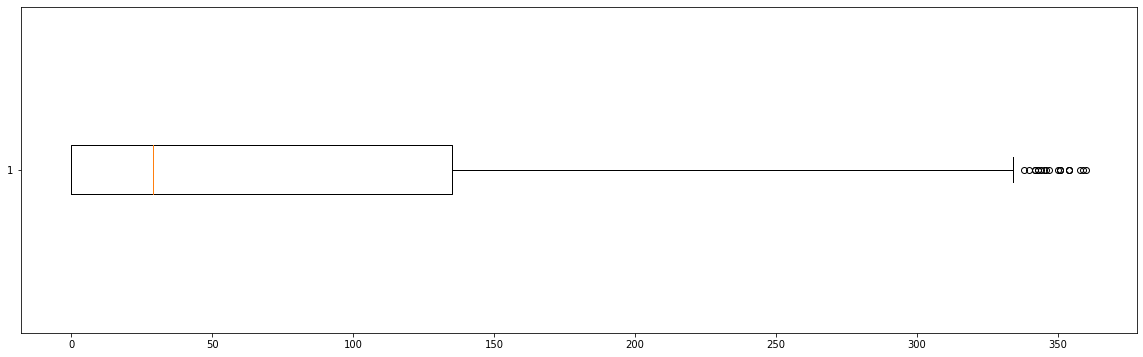

Lower whisker of LATE_AIRCRAFT_DELAY: 0.0
Upper_whisker of LATE_AIRCRAFT_DELAY: 334.0


In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
boxplot_lines = plt.boxplot(ev_data['LATE_AIRCRAFT_DELAY'], vert=False)
print('Boxplot of LATE_AIRCRAFT_DELAY:')
plt.show()

lower_whisker_LAD = boxplot_lines["caps"][0].get_xdata()[0]
upper_whisker_LAD = boxplot_lines["caps"][1].get_xdata()[0]
print("Lower whisker of LATE_AIRCRAFT_DELAY:", lower_whisker_LAD)
print("Upper_whisker of LATE_AIRCRAFT_DELAY:", upper_whisker_LAD)
cleaned_data_late_aircraft = ev_data[ev_data['LATE_AIRCRAFT_DELAY'] < upper_whisker_LAD]

Boxplot of AIR_SYSTEM_DELAY:


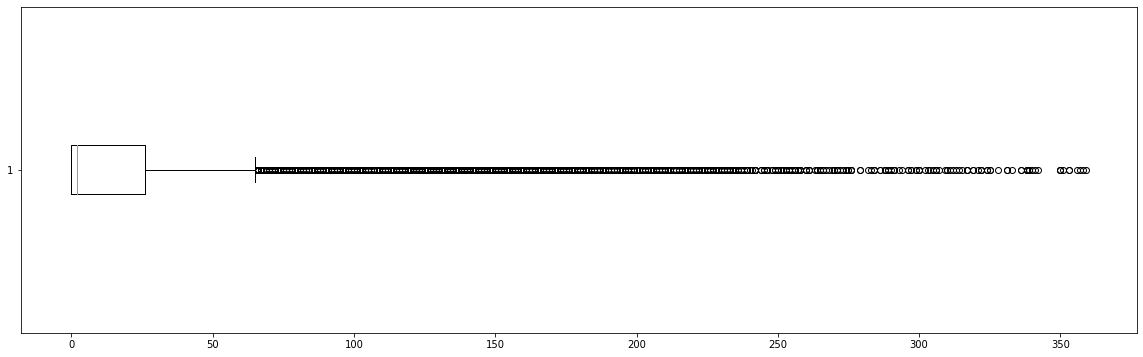

Lower whisker of AIR_SYSTEM_DELAY: 0.0
Upper_whisker of AIR_SYSTEM_DELAY: 65.0


In [9]:
plt.figure(figsize=(20,6))
boxplot_lines = plt.boxplot(ev_data['AIR_SYSTEM_DELAY'], vert=False)
print('Boxplot of AIR_SYSTEM_DELAY:')
plt.show()

lower_whisker_ASD = boxplot_lines["caps"][0].get_xdata()[0]
upper_whisker_ASD = boxplot_lines["caps"][1].get_xdata()[0]
print("Lower whisker of AIR_SYSTEM_DELAY:", lower_whisker_ASD)
print("Upper_whisker of AIR_SYSTEM_DELAY:", upper_whisker_ASD)
cleaned_data_air_system = ev_data[ev_data['AIR_SYSTEM_DELAY'] < upper_whisker_ASD]

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [35]:
from statistics import median, mean, mode, stdev, variance

print("\t", "ev_data\t\t\t", "cleaned_data_late_aircraft\t", "cleaned_data_air_system", end="\t\n")
for metric, metric_name in [
                            [median, "Median"],
                            [mean, "Mean"],
                            [mode, "Mode"],
                            [stdev, "Standard deviation"],
                            [variance, "Variance"],
                           ]:
    print(metric_name+":")
    for dataset in [ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]:
        print("\t {value:<20}".format(value=metric(dataset["ARRIVAL_DELAY"])), end="\t")
    print()

	 ev_data			 cleaned_data_late_aircraft	 cleaned_data_air_system	
Median:
	 166.0               		 166.0               		 162.0               	
Mean:
	 181.1332669322709   		 180.96580259222333  		 177.57739734227223  	
Mode:
	 130.0               		 130.0               		 138.0               	
Standard deviation:
	 58.12157354520023   		 57.907571139899126  		 56.47209688515726   	
Variance:
	 3378.117311370119   		 3353.286795322478   		 3189.097726606588   	


    Your answer: 
    
* All the basic statistical features of **ARRIVAL_DELAY** seems alike. The clean procedure in subpoint (c) seems no obvious effect on **ARRIVAL_DELAY**.

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

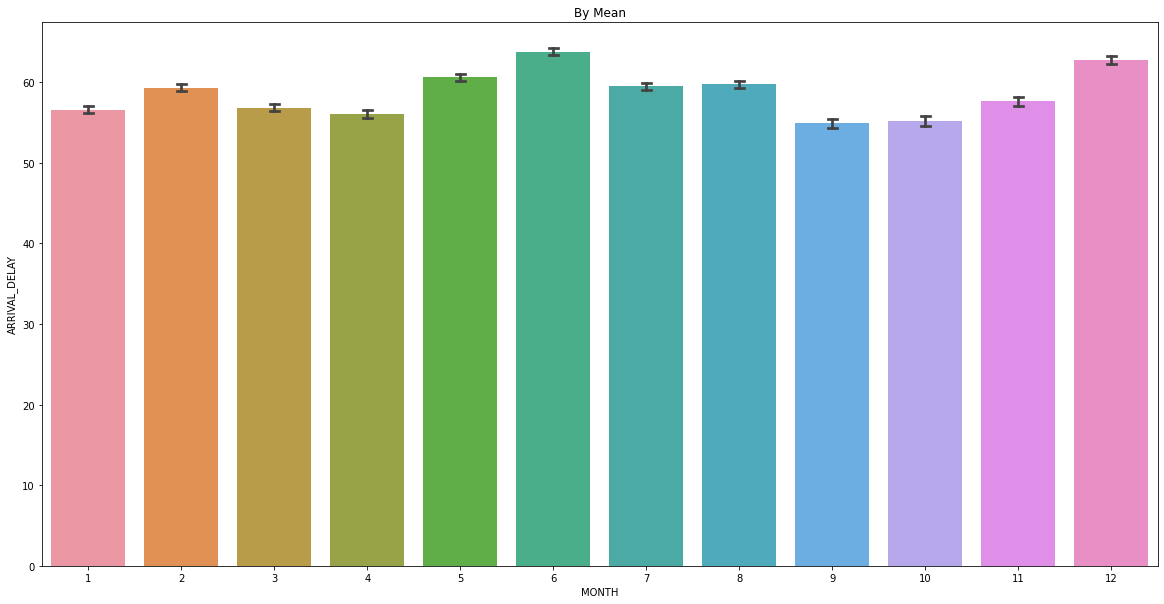

In [40]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=no_null_data, estimator=np.mean, capsize=.1)
plt.title("By Mean")
plt.show()

    Your answer:
* Based on the chart, September and October seem have the lowest arrival delay, June and December seem have the worst delay situation.
* When prefer the minimum delay, it's better to book flight tickets in September and October.

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

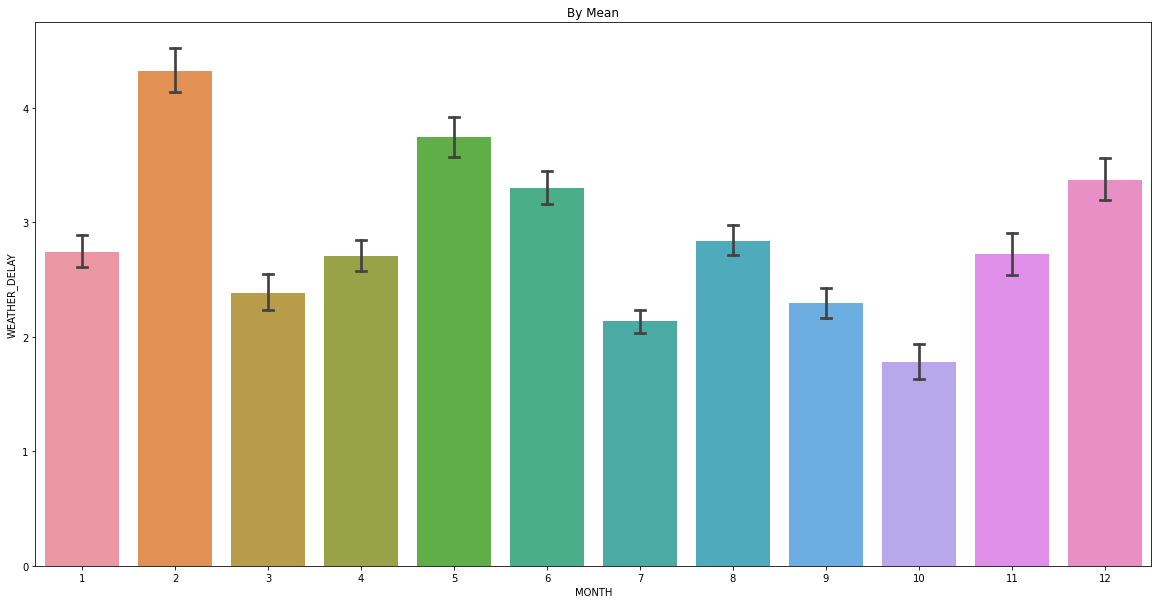

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='MONTH', y='WEATHER_DELAY', data=no_null_data, estimator=np.mean, capsize=.1)
plt.title("By Mean")
plt.show()

    Your answer:
* October has the minimum weather delay.
* Febuary has the maximum weather delay.

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
* We think the weather condition is also a very effective influencing factor before looking at the data. After compare the two charts, it seems the weather condition is not that influencing, as the development of technology can ignore the influence of the weather.
* There are usually holidays in June and December, which increases the number of people traveling. We think that's the reason why June and December have the worst delay situation.

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

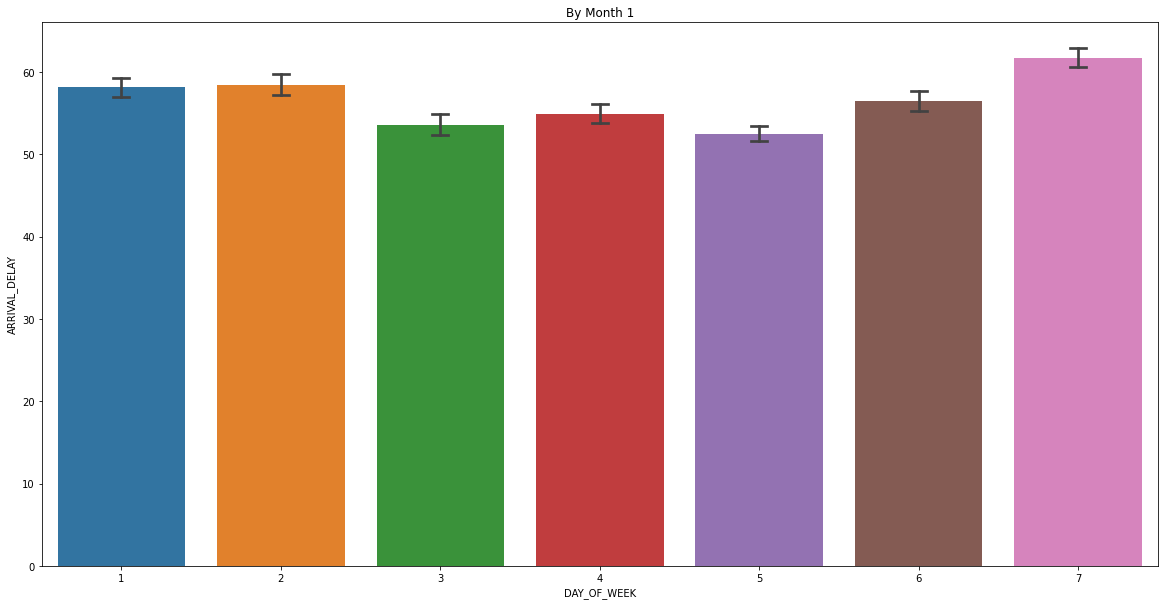

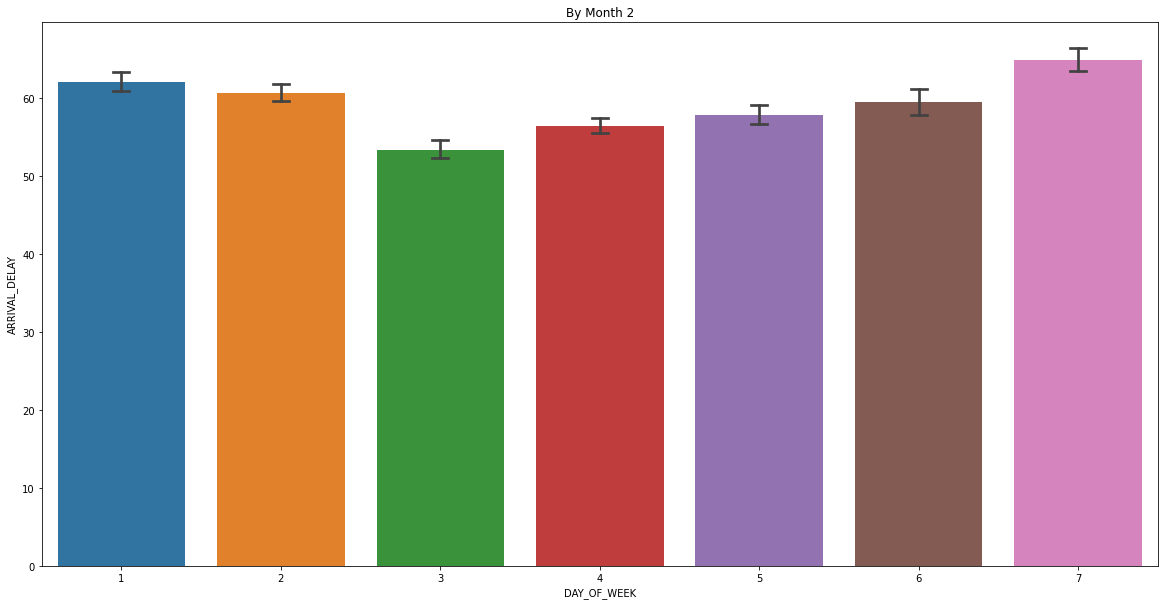

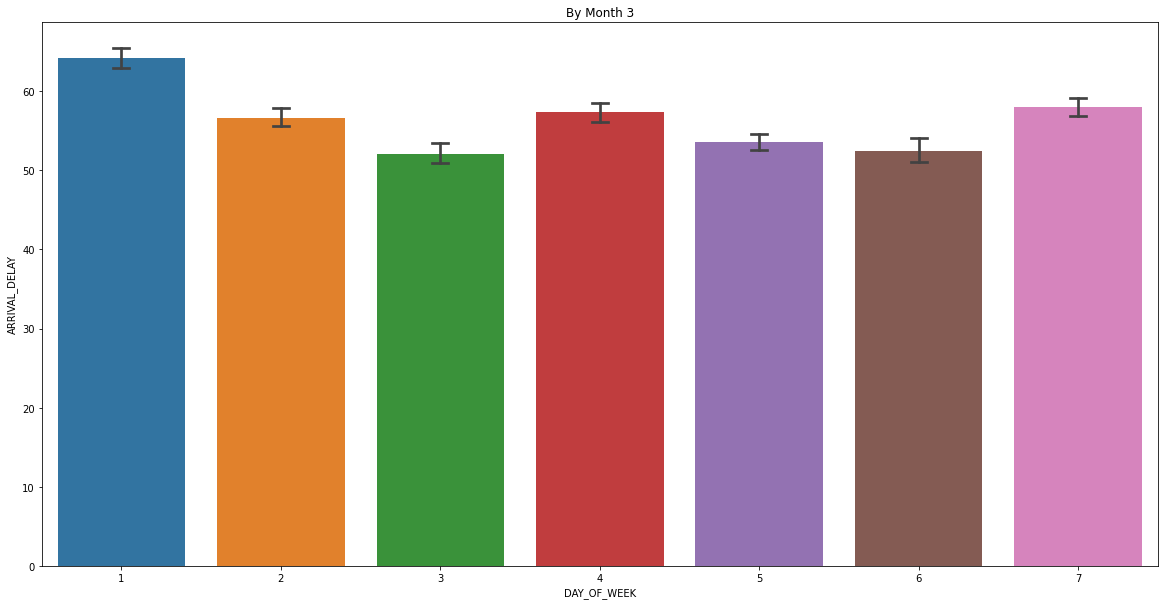

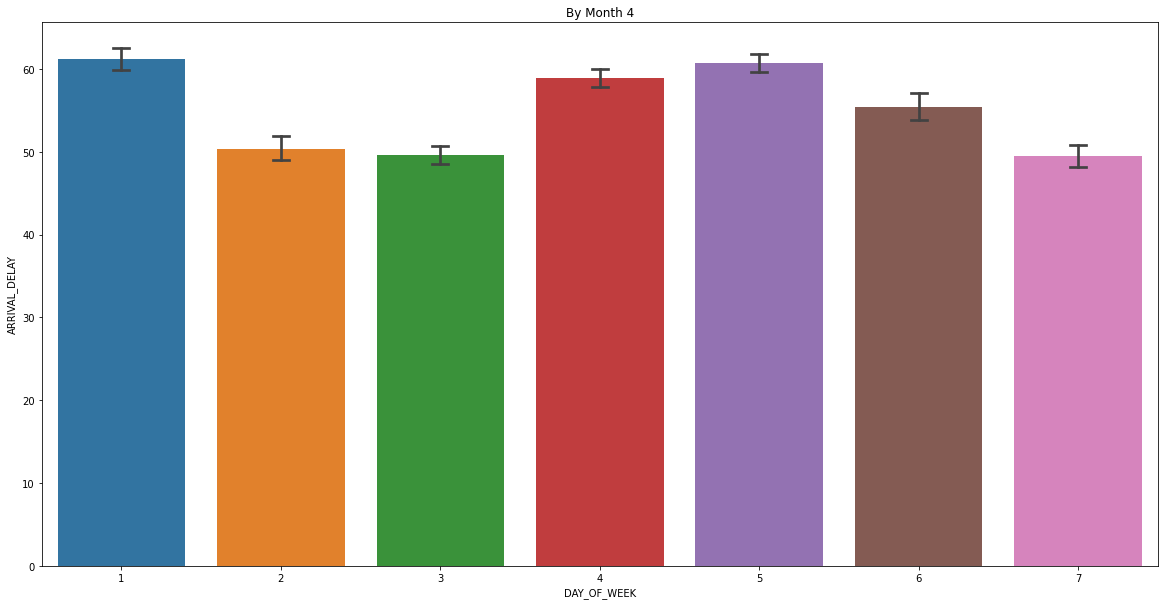

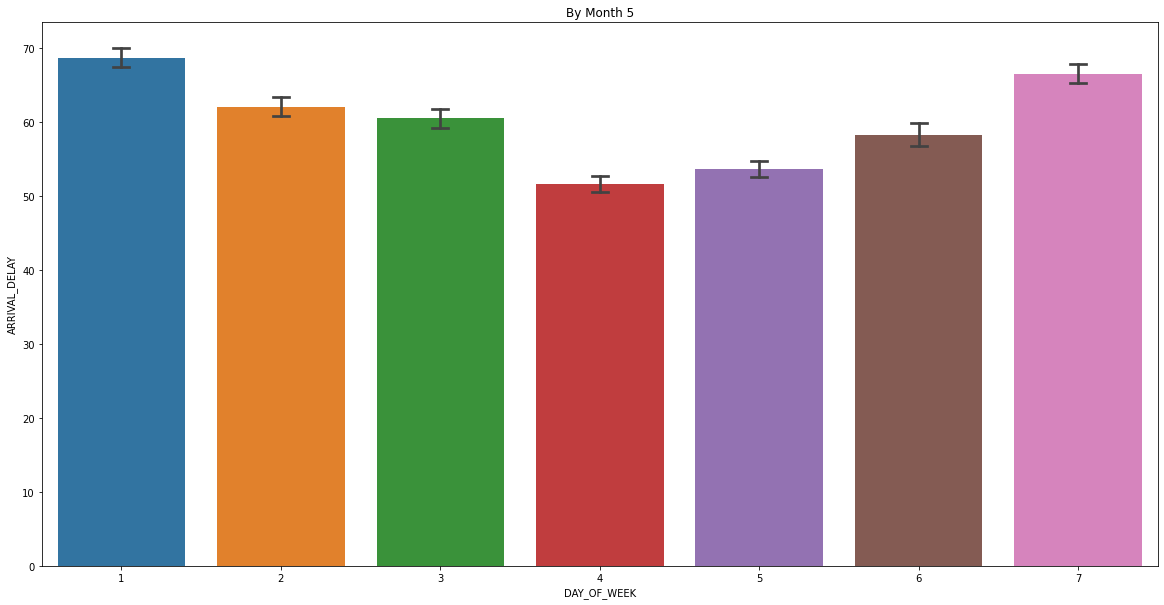

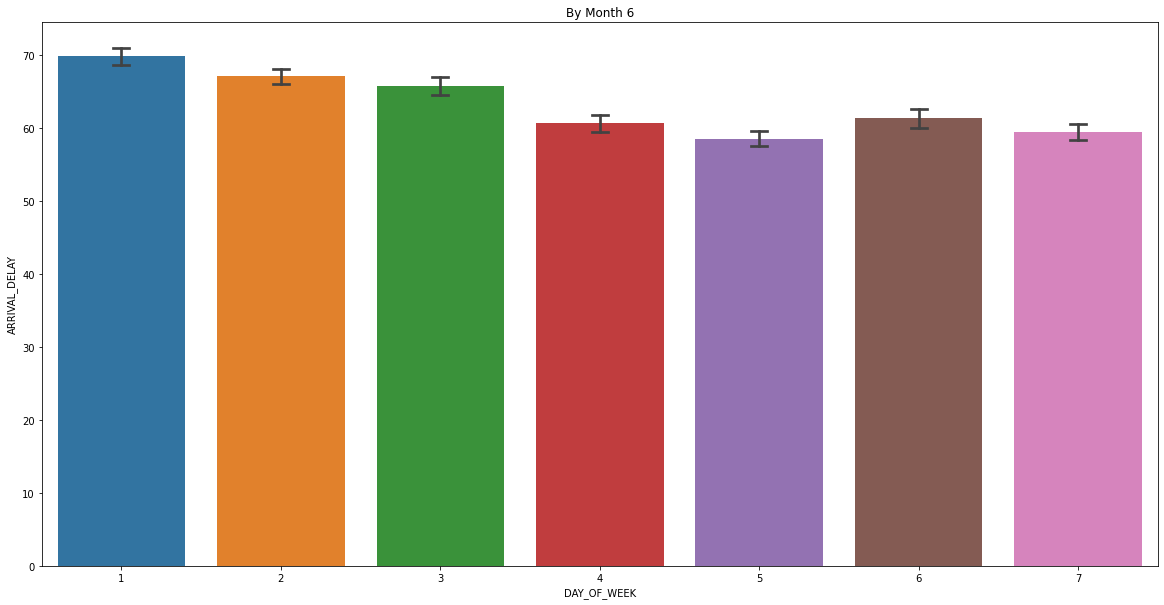

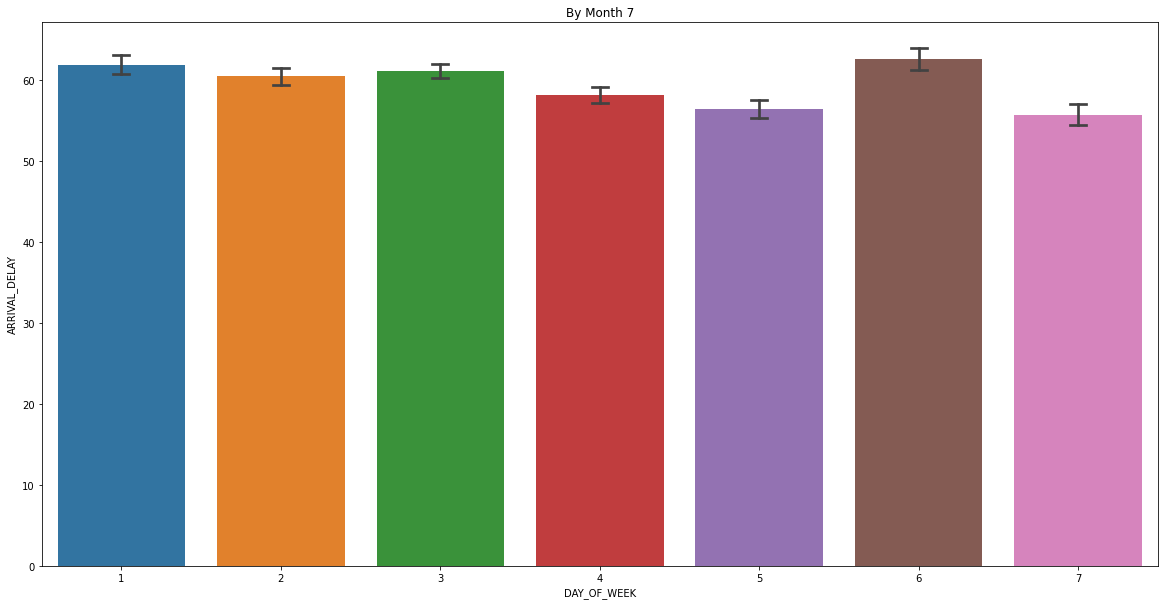

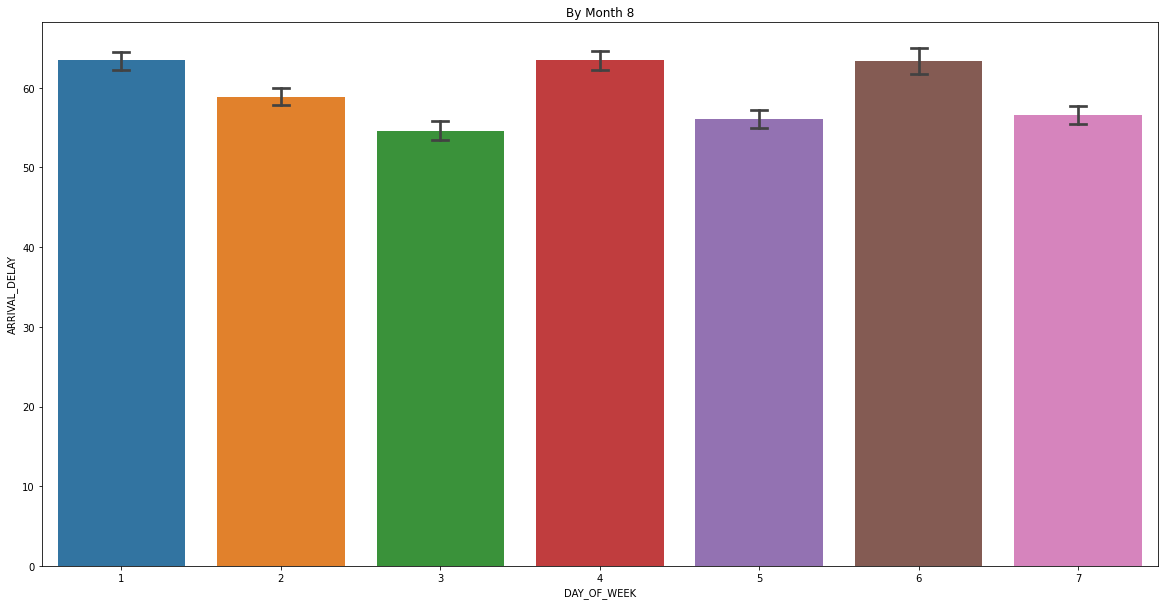

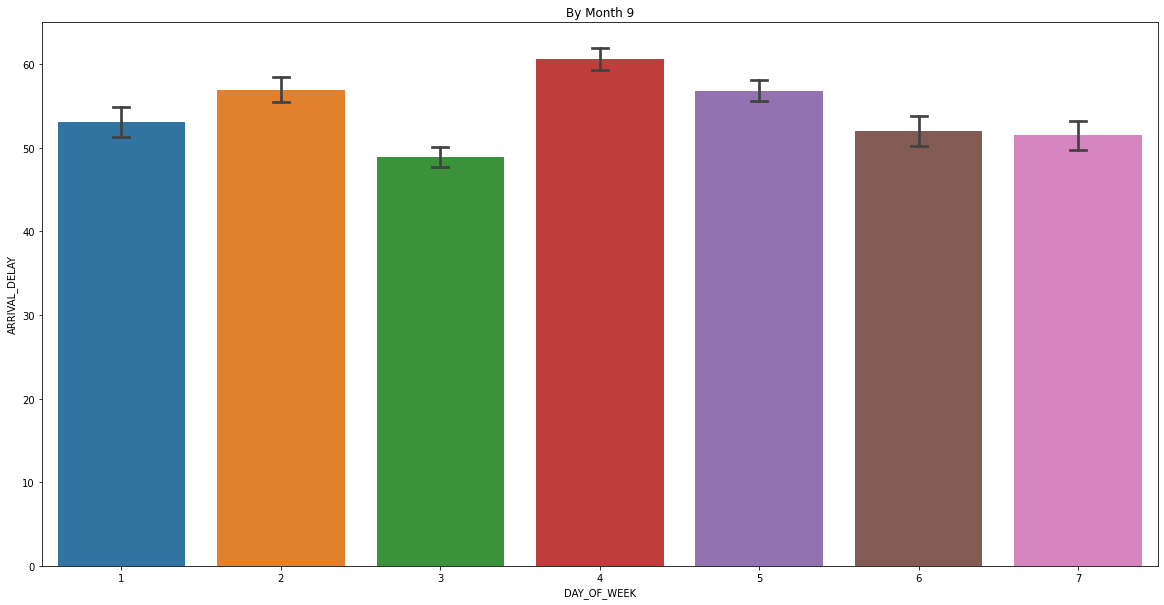

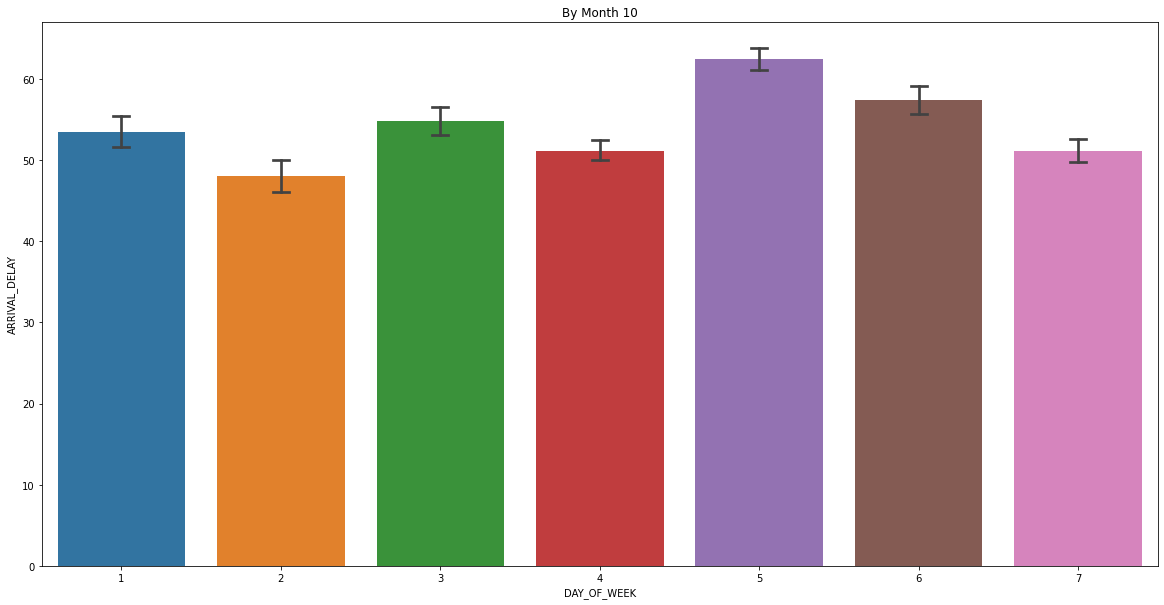

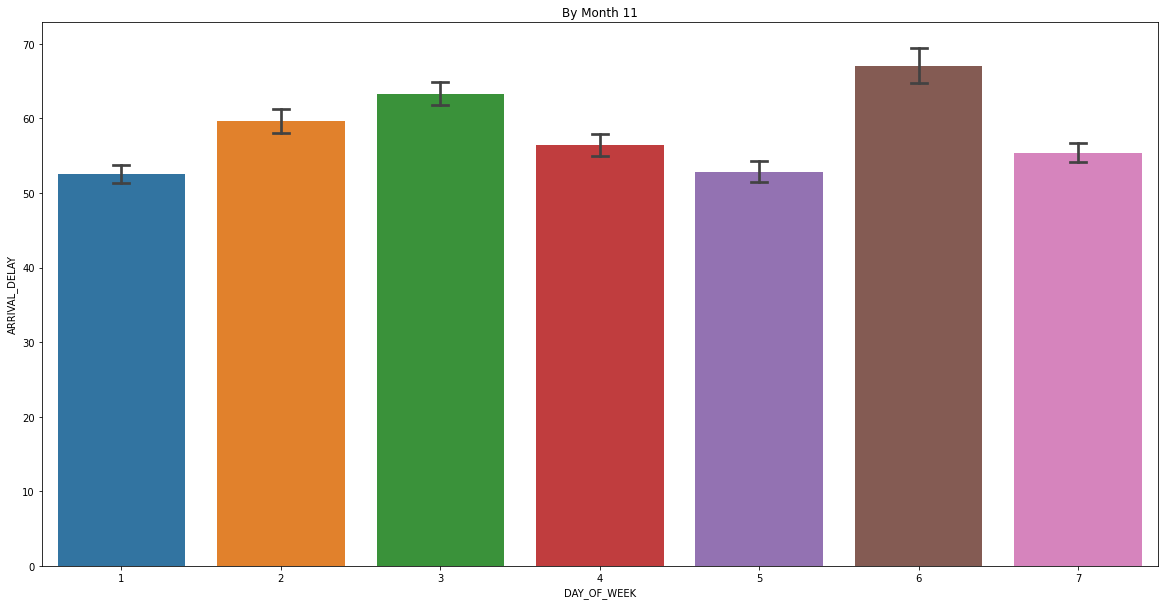

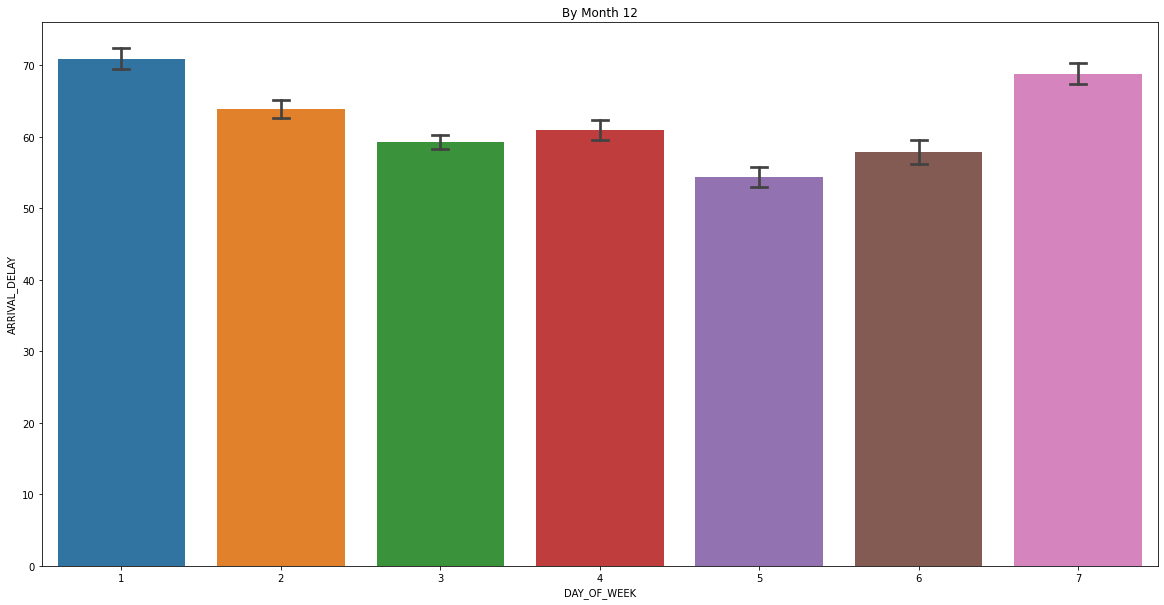

In [44]:
for _month in range(1, 13, 1):
    plt.figure(figsize=(20,10))
    sns.barplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=no_null_data[no_null_data['MONTH'] == _month], estimator=np.mean, capsize=.1)
    plt.title("By Month {}".format(_month))
    plt.show()

    Your answer:
* In general, Sunday of January, Monday of March, Monday of May, Sunday of May, Monday of July, are 5 combinations that should be avoided to take a flight.

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

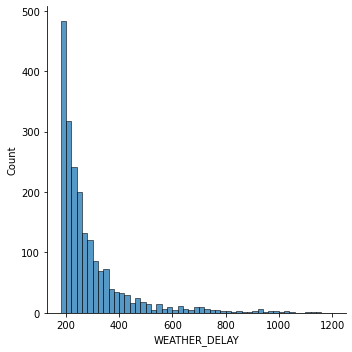

In [53]:
sns.displot(data=no_null_data,
            x="WEATHER_DELAY",
            bins=np.arange(start=180,
                           stop=np.max(no_null_data['WEATHER_DELAY']),
                           step=20))


#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

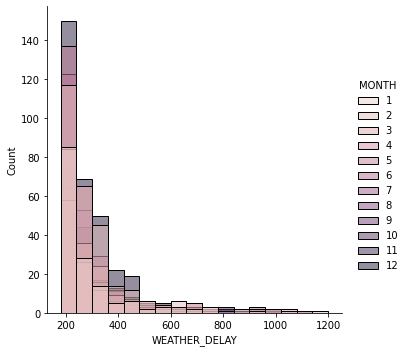

In [55]:
sns.displot(data=no_null_data,
            x="WEATHER_DELAY",
            hue="MONTH",
            bins=np.arange(start=180,
                           stop=np.max(no_null_data['WEATHER_DELAY']),
                           step=60))

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

Airline EV:
Airline VX:


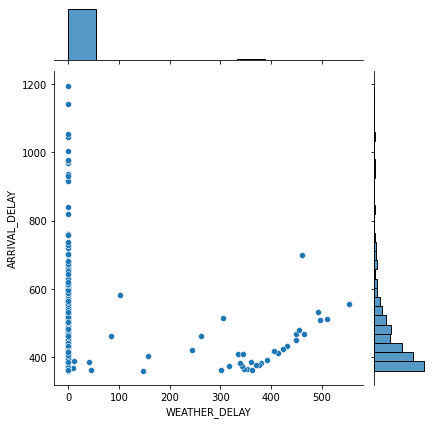

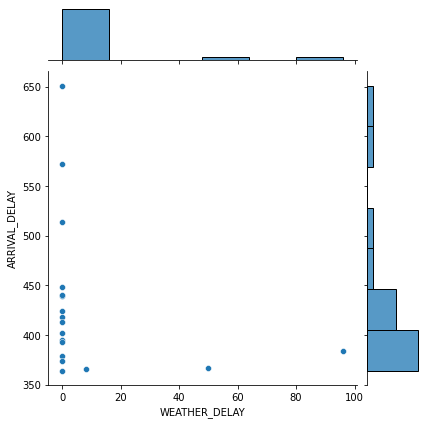

In [56]:
more_than_6_arrival_delay = no_null_data[no_null_data['ARRIVAL_DELAY'] >= 360] 
print('Airline EV:')
sns.jointplot(x='WEATHER_DELAY',
              y='ARRIVAL_DELAY',
              data=more_than_6_arrival_delay[more_than_6_arrival_delay['AIRLINE'] == 'EV'],
              kind="scatter")
print('Airline VX:')
sns.jointplot(x='WEATHER_DELAY',
              y='ARRIVAL_DELAY',
              data=more_than_6_arrival_delay[more_than_6_arrival_delay['AIRLINE'] == 'VX'],
              kind="scatter")

       Your answer:


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [64]:
q2_no_null_data = no_null_data.copy(deep=True)
q2_ua_data = q2_no_null_data[q2_no_null_data['AIRLINE'] == 'UA']
q2_ua_data['DELAY'] = q2_ua_data.apply(
    lambda row: 'acceptable_delay' if row['ARRIVAL_DELAY'] <= 45 else 'unacceptable_delay',
    axis=1
    )
distance = q2_ua_data.describe()['DISTANCE']
distance_thershold = (distance['max']-distance['min'])/2
print('Distance threshold is {}'.format(distance_thershold))
q2_ua_data['DISTANCE_CATEGORY'] = q2_ua_data.apply(
    lambda row: 'short' if row['DISTANCE'] <= distance_thershold else 'long',
    axis=1
    )
q2_ua_data.head()


/var/folders/k4/_rl2fsxs273cwny3pz_6_mj00000gn/T/ipykernel_33964/3758456553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_ua_data['DELAY'] = q2_ua_data.apply(


Distance threshold is 2427.0


/var/folders/k4/_rl2fsxs273cwny3pz_6_mj00000gn/T/ipykernel_33964/3758456553.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_ua_data['DISTANCE_CATEGORY'] = q2_ua_data.apply(


Unnamed: 0  Unnamed: 0.1  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  \
824010      824010        620289  2015      6    4            4      UA   
389469      389469        562989  2015      8    5            3      UA   
673518      673518        671502  2015      8   15            6      UA   
147525      147525        879885  2015      2   26            4      UA   
930415      930415        784502  2015      8   10            1      UA   

        FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  ... AIR_SYSTEM_DELAY  \
824010           1298      N38454            MCO  ...              0.0   
389469           1626      N87512            ORD  ...              0.0   
673518             12      N73270            ORD  ...              0.0   
147525            605      N646UA            ORD  ...             31.0   
930415            269      N415UA            ORD  ...              0.0   

        SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
824010             0.0           40.0                  0.0            0.0   
389469             0.0           50.0                  0.0            0.0   
673518             0.0            0.0                 10.0           13.0   
147525             0.0            0.0                 93.0           21.0   
930415             0.0            5.0                 78.0            0.0   

        DAY_YEARLY  WEEK  SCHEDULED_DEPARTURE_CATEGORY               DELAY  \
824010         155    22                       Morning    acceptable_delay   
389469         217    31                       Evening  unacceptable_delay   
673518         227    32                       Evening    acceptable_delay   
147525          57     8                       Morning  unacceptable_delay   
930415         222    31                       Evening  unacceptable_delay   

        DISTANCE_CATEGORY  
824010              short  
389469              short  
673518              short  
147525              short  
930415              short  

[5 rows x 38 columns]

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [67]:
from p_decision_tree.DecisionTree import DecisionTree

descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY',
                        'DISTANCE_CATEGORY',
                        'DAY_OF_WEEK']
target_feature = 'DELAY'

q2b_data = q2_ua_data.copy(deep=True)

q2b_str = q2b_data.copy()
for column in q2b_str.columns:
    q2b_str[column]= q2b_str[column].astype(str)

df_descriptive = q2b_str[descriptive_features].values
df_target = q2b_str[target_feature].values

tree = DecisionTree(df_descriptive.tolist(),
                     descriptive_features,
                     df_target.tolist(),
                     "entropy")
tree.id3(0, 1000)
visualTree = tree.print_visualTree(render=True)

# see the output visualTree.gv.pdf

#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
* As the visualized tree in visualTree.gv.pdf shows, the best feature is **DAY_OF_WEEK** for splitting the tree in the second round of ID3.

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
* Tuesday afternoon seems more prone to more than 45 minutes delay as regardless of **DISTANCE_CATEGORY**, all branch goes to unacceptable_delay.
* Tuesday evening is also the same case.

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [3]:
flights_classifying = pd.read_csv('flights_classifying.csv')

Randomly order the data points using one of the group member's students as the random state.

In [4]:
flights_sampled = flights_classifying.sample(frac=1, random_state=random_seed)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [5]:
q3_sampled = flights_sampled.copy(deep=True)
q3_no_cancel = q3_sampled.drop(q3_sampled[q3_sampled['CANCELLED'] == 1].index)

print('Check CANCELLED value:')
print(q3_no_cancel['CANCELLED'].unique())

q3_target_feature = q3_no_cancel.apply(
    lambda row: 'more then 3 hours' if row['ARRIVAL_DELAY'] > 180 else 'less then 3 hours',
    axis=1)
q3_no_cancel['TARGET'] = q3_target_feature

Check CANCELLED value:
[0]


In [7]:
# List the features
q3_no_cancel.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
Unnamed: 0.1.1                    int64
YEAR                              int64
MONTH                             int64
DAY                               int64
DAY_OF_WEEK                       int64
AIRLINE                          object
FLIGHT_NUMBER                     int64
TAIL_NUMBER                      object
ORIGIN_AIRPORT                   object
DESTINATION_AIRPORT              object
SCHEDULED_DEPARTURE               int64
DEPARTURE_TIME                  float64
DEPARTURE_DELAY                 float64
TAXI_OUT                        float64
WHEELS_OFF                      float64
SCHEDULED_TIME                  float64
ELAPSED_TIME                    float64
AIR_TIME                        float64
DISTANCE                          int64
WHEELS_ON                       float64
TAXI_IN                         float64
SCHEDULED_ARRIVAL                 int64
ARRIVAL_TIME                    float64


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

Charts of each pre-selected features:


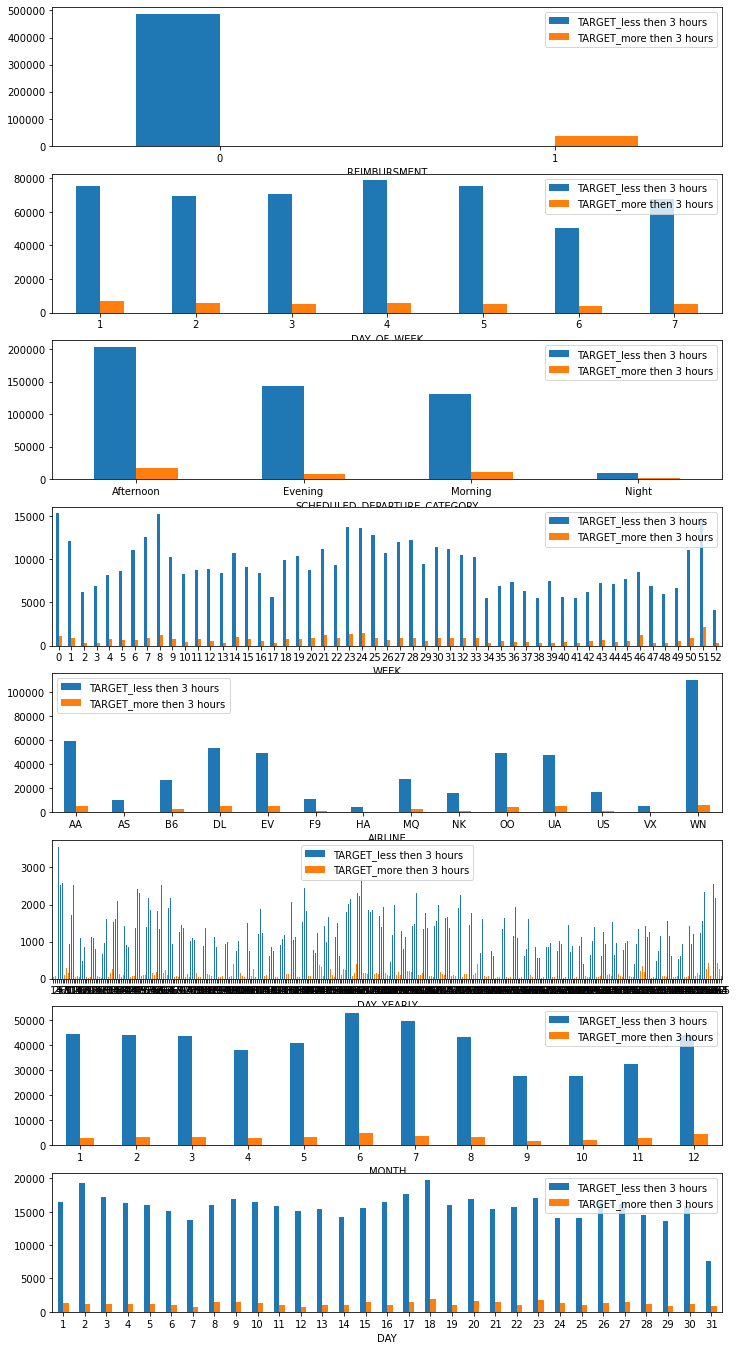

In [10]:
import matplotlib.pyplot as plt

pre_selected_features = ['REIMBURSMENT', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE_CATEGORY', 'WEEK',
                         'AIRLINE', 'DAY_YEARLY', 'MONTH', 'DAY']

print('Charts of each pre-selected features:')
fig, axes = plt.subplots(nrows=len(pre_selected_features), ncols=1, figsize=(12, 24))
for plt_row, feature in enumerate(pre_selected_features):
    (pd.get_dummies(q3_no_cancel[[feature,'TARGET']], columns=['TARGET'])
           .groupby(feature).sum()
           .plot.bar(ax=axes[plt_row,], rot=0))

Explanation:

* The descriptive features we selected are **SCHEDULED_DEPARTURE_CATEGORY**, **DAY_OF_WEEK**, **AIRLINE**, **MONTH**.
* We choose thses features based on the factors of our choice as a customer to take a flight. For example, we can choose which **AIRLINE** we want to take with minimum percentage of delay, but we can't choose **ORIGIN_AIRPORT** since the international airport in a country is always limited.
* **DAY_YEARLY**, **WEEK**, and **DAY** are too scattered to create a good model. They might lead to far to precise solutions/overfitting that are not generalizable.

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [46]:
from sklearn.model_selection import train_test_split

selected_features = ['DAY_OF_WEEK', 'SCHEDULED_DEPARTURE_CATEGORY',
                     'AIRLINE', 'MONTH']
descriptive_features = q3_no_cancel[selected_features]
# one-hot encoding
descriptive_features = pd.get_dummies(descriptive_features, columns = ['AIRLINE', 'SCHEDULED_DEPARTURE_CATEGORY'])
# normalized
descriptive_features = descriptive_features.apply(lambda x: x/x.max(), axis=0)

target_feature = q3_target_feature.apply(
    lambda row: 1 if row == 'more then 3 hours' else 0)


q3_X_train, q3_X_test, q3_y_train, q3_y_test = train_test_split(
    descriptive_features, 
    target_feature, 
    test_size=0.85, 
    random_state=random_seed,
    stratify=q3_target_feature)

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [16]:
from sklearn.metrics import accuracy_score

    Your answer:
    
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [48]:
from sklearn.dummy import DummyClassifier

print('We can see "less then 3 hours" is the most frequent value:')
print(q3_target_feature.describe())

print('So we use a DummyClassifier with most_frequent strategy to help us find the baseline:')
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(q3_X_train, q3_y_train)
score_baseline = dummy_clf.score(q3_X_test, q3_y_test)
print(score_baseline)

We can see "less then 3 hours" is the most frequent value:
count                525584
unique                    2
top       less then 3 hours
freq                 487765
dtype: object
So we use a DummyClassifier with most_frequent strategy to help us find the baseline:
0.9280442845726999


    Your answer:
    
* As the simply "analysis" shows, the most frequent value is 'less then 3 hours', so we can test out the baseline with always predicts the most frequent label ('less then 3 hours') in the training set.

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'multi_class': ['auto', 'ovr', 'multinomial'],
              'solver' : ['newton-cg', 'liblinear', 'sag', 'saga']
             }
grid = GridSearchCV(LogisticRegression(), param_grid) 
grid.fit(q3_X_train, q3_y_train)
print('The best params:')
print(grid.best_params_) 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model

The best params:
{'multi_class': 'auto', 'solver': 'newton-cg'}


In [50]:
regression = LogisticRegression(solver="newton-cg",
                                multi_class="auto")
regression.fit(q3_X_train, q3_y_train)
score_regression = accuracy_score(q3_y_test, regression.predict(q3_X_test))
print(score_regression)

0.9280442845726999


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [51]:
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  
grid = GridSearchCV(SVC(C=1), param_grid) 
grid.fit(q3_X_train[:10000], q3_y_train[:10000])
print('The best params:')
print(grid.best_params_) 

The best params:
{'kernel': 'linear'}


In [52]:
svm = SVC(C=1, kernel = 'linear', gamma = 'auto')
svm.fit(q3_X_train, q3_y_train)
score_svm = accuracy_score(q3_y_test, svm.predict(q3_X_test))
print(score_svm)

0.9280442845726999


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [53]:
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

param_grid = {'hidden_layer_sizes': [10, 50, 100],
             'activation': ['logistic', 'tanh', 'relu'],
             'solver': ['sgd', 'adam']}
              
grid = GridSearchCV(MLPClassifier(), param_grid) 
grid.fit(q3_X_train[:10000], q3_y_train[:10000])
print('The best params:')
print(grid.best_params_) 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status

The best params:
{'activation': 'logistic', 'hidden_layer_sizes': 10, 'solver': 'sgd'}


In [54]:
nn = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd')
nn.fit(q3_X_train, q3_y_train)
score_nn = accuracy_score(q3_y_test, nn.predict(q3_X_test))
print(score_nn)

0.9280442845726999


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [58]:
scores = pd.DataFrame(data={'type': ['baseline', 'regression', 'svm', 'nn'],
                            'score': [score_baseline, score_regression, score_svm, score_nn]})
scores['rank'] = scores['score'].rank()
print('Rank of each type of models:')
scores

Rank of each type of models:


type     score  rank
0    baseline  0.928044   2.5
1  regression  0.928044   2.5
2         svm  0.928044   2.5
3          nn  0.928044   2.5

    Your answer:
    
* The accuracy score of each model including baseline is all the same.
* Obviously using any of our models cannot give any suggestion to select the flight without delay.

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [ ]:
# Your code


    Your answer:
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [ ]:
# Your code


    Your answer:
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

In [ ]:
# Your code


    Your answer:
    